# Introduction

---

## WaveNet Implementation: Based on Andrej Karpathy's Lecture

This notebook is a practical follow-up to Andrej Karpathy's "Building makemore Part 5: Building a WaveNet" lecture. Check out the full lecture [here](https://www.youtube.com/watch?v=t3YJ5hKiMQ0).

Here's what we'll cover:

1. **Model Basics**: Introduction to a multi-layer perceptron character-level language model.
2. **Model Enhancement**: Expanding the architecture and input characters for better results.
3. **WaveNet Overview**: Understand WaveNet's hierarchical structure and its predictions.
4. **Batch Normalization**: Dive into the BatchNorm layer and its challenges.
5. **PyTorch Containers**: A look at how PyTorch structures its layers.
6. **Dataset Expansion**: Increase the context length for performance improvement.
7. **Forward Pass**: Visualization of tensor transformations in the network.
8. **BatchNorm1D Bug**: Addressing an implementation bug.
9. **Development Insights**: Best practices in deep neural network development.
10. **Optimizing WaveNet**: Suggestions and strategies for better performance.

This notebook aims to provide a clear understanding of WaveNet's development and optimization process.

---

## WaveNet

### WaveNet Overview:
- **Nature of the Model**: WaveNet is a fully probabilistic and autoregressive model. This means that when predicting any given audio sample, it considers all the previous samples.
- **Efficiency**: It can be trained efficiently on very high-resolution audio data (e.g., data with tens of thousands of samples per second).
- **Performance**: For text-to-speech tasks, human listeners rated the outputs of WaveNet as more natural sounding than other leading methods. Additionally, it can switch between different speakers by conditioning on the speaker's identity. WaveNet can also generate musical fragments that sound realistic.

### Technical Insights:

1. **Generative Model for Audio**: WaveNet operates directly on raw audio, predicting the probability of each audio sample based on the previous ones. The model's structure is inspired by PixelCNN, which was designed for images.

2. **Dilated Causal Convolutions**: To ensure that predictions for any timestep don't depend on future timesteps, the model uses causal convolutions. "Dilated" convolutions are introduced to effectively increase the receptive field (the portion of the input data the model "sees") without significantly increasing computational cost.

3. **Softmax Distributions**: Instead of using a mixture model, the paper employs a softmax distribution for modeling audio samples. To manage the high-resolution of raw audio, a µ-law companding transformation is applied to the data before quantizing it.

4. **Gated Activation Units**: The paper uses a specific type of activation function for the neural network, which was found to work particularly well for audio signals.

5. **Residual and Skip Connections**: These are techniques to help train deeper neural networks more effectively. They help in faster convergence and enable deeper model architectures.

6. **Conditional WaveNets**: WaveNet can be conditioned on additional inputs, which allows it to generate audio with specific characteristics. For example, by conditioning on a speaker's identity, WaveNet can produce audio in that speaker's voice. The paper distinguishes between global conditioning (affecting the whole audio) and local conditioning (affecting specific parts of the audio).

7. **Context Stacks**: To increase the receptive field size, the paper introduces the concept of context stacks. These are separate smaller networks that process longer parts of the audio signal and condition the primary WaveNet model.

### Applications:
- **Text-to-Speech (TTS)**: WaveNet can produce very natural-sounding speech, surpassing other state-of-the-art systems.
- **Voice Modulation**: A single WaveNet model can mimic many different speakers.
- **Music Generation**: WaveNet can generate realistic musical fragments.
- **Other Audio Tasks**: The model is also promising for tasks like speech enhancement, voice conversion, and source separation.

In essence, WaveNet is a breakthrough in audio generation, offering a versatile and powerful model for a range of audio-related tasks.

## Our model gets improved using ideas from Wavenet

The finished model is inspired by WaveNet, which is a deep learning architecture designed for generating raw audio waveforms.

**Innovation**:
1. **Hierarchical Fusion of Information**: Instead of squashing all the character information into a single layer right at the beginning, the new model aims for a more hierarchical approach. This is akin to WaveNet's methodology where information from previous contexts gets fused progressively as the network gets deeper. It's a departure from the original network that was more linear in its approach.
2. **FlattenConsecutive Layer**: This new layer is essentially reshaping the data by grouping consecutive embeddings, which helps in retaining more granularity of information for longer sequences.
3. **Increased Depth with Batch Normalization**: The model has added depth, with multiple hidden layers interspersed with BatchNorm layers. Batch Normalization helps in stabilizing and accelerating the training of deeper networks.

**Intuition**:
1. **Preserving Contextual Information**: By not immediately squashing all characters into a single layer, the network retains more of the raw, granular information from the input. This is crucial when predicting the next character based on a sequence of prior characters. The more original context the model has, the better its predictive capability.
2. **Progressive Fusion of Information**: Just as our human cognition processes information hierarchically (from letters to words to sentences to paragraphs), the model is designed to gradually combine information. It first understands pairs of characters, then bigger chunks, and so on. This allows the model to capture both short-term and long-term dependencies in the data.
3. **Stability with Batch Normalization**: Deep networks can suffer from internal covariate shift where the distribution of layer inputs changes during training. Batch normalization standardizes the inputs of a layer, making training more stable and faster.
4. **Embedding Layer**: It's a look-up table that maps from integer indices (representing specific words or characters) to dense vectors (their embeddings). These vectors are trainable and can capture the semantic relationship between words or characters. By using embeddings, the model can capture richer representations of the input data.

In summary, the hierarchical approach is inspired by WaveNet's methodology of processing audio signals, where the prediction for the next audio sample depends on a gradually fused context of previous samples. By applying a similar approach to character prediction, the model aims to capture richer contextual information, leading to better predictions.

# Summary of transcript




**Overview**
The lecture centers around the implementation and enhancement of a character-level language model using neural networks. The instructor emphasizes the evolution from a simple multi-layer perceptron to a more complex, hierarchically structured network resembling the WaveNet model.

**Location Change**
The instructor notes a change in their background as they are currently in Kyoto.

**Model Introduction**
- The initial model is a multi-layer perceptron character-level language model.
- It takes three previous characters as input to predict the fourth character.
- It uses a single hidden layer of neurons.

**Desire for Model Enhancement**
- The instructor expresses the need to complexify the architecture.
  - Increase the number of input characters.
  - Avoid compressing information too quickly into a single hidden layer.
  - Instead, aim for a deeper model that fuses information progressively.

**Introduction to WaveNet**
- WaveNet is a model published in 2016.
- It is primarily a language model that predicts audio sequences instead of character sequences.
- It adopts an auto-regressive model approach, predicting the next character in a sequence.
- WaveNet uses a hierarchical tree-like structure, progressively combining character information.

**Code Overview**
- The code begins with imports and data processing.
- The dataset consists of 182,000 examples where three characters predict the fourth one.
- The instructor introduces the concept of "layers" which act as building blocks for neural networks.
- These layers have similar APIs and signatures to those in PyTorch.

**Batch Normalization (BatchNorm) Layer**
- The BatchNorm layer plays a significant role in the neural network.
- It has unique characteristics:
  - Trains running mean and variance outside of backpropagation.
  - Has different behaviors during training and evaluation.
  - Controls the activation statistics.
- BatchNorm can introduce potential bugs due to its complexity and behavior changes between training and evaluation modes.

**PyTorch Containers**
- PyTorch has a concept called containers to organize layers.
- `Sequential` is a module in PyTorch that maintains a list of layers and processes input through all the layers sequentially.

**Expanding the Dataset**
- The instructor then increases the block size from 3 to 8, meaning the model now considers eight characters of context to predict the ninth character.
- Just by increasing the context length, there's a notable improvement in model performance.

**Takeaways**
The lecture provides a deep dive into building and refining a character-level language model. It touches upon the importance of model architecture, the challenges and intricacies of certain layers like BatchNorm, and the benefits of using tools and structures provided by libraries like PyTorch. The overarching theme is the continual iteration and refinement of the model to achieve better performance.

---

## WaveNet Implementation and Tensor Management

### Forward Pass Visualization
The lecturer is working on a neural network implementation of WaveNet. To ensure understanding and correct functioning, they visualize the forward pass by observing tensor shapes at each stage. This helps in understanding data transformations as it progresses through the network.

### Input Batch and Shape
A batch of 4 random examples is created for debugging. The shape of the batch (referred to as \( xB \)) is \($ 4 \times 8 $\) due to having 4 examples and a block size of 8.

### Embedding Layer
The first layer is the embedding layer. When the integer tensor \( xB \) is passed through this layer, the output shape becomes \( $4 \times 8 \times 10 $\). Here, each character has a 10-dimensional vector representation. The embedding layer takes the integers and converts them into these 10-dimensional vectors.

### Flattening and Concatenation
The flattened layer views the \( $4 \times 8 \times 10 $\) tensor as a \( $4 \times 80 $\) tensor. The effect is that the 10-dimensional embeddings for the 8 characters are lined up in a row, appearing as if they've been concatenated.

### Linear Layer and Matrix Multiplication
The linear layer is responsible for transforming the shape from \( $4 \times 80 $\) to \($ 4 \times 200$ \). This is achieved through matrix multiplication. The lecturer emphasizes that in PyTorch, the matrix multiplication operator is versatile and can handle higher-dimensional tensors, treating earlier dimensions as batch dimensions.

### Restructuring Input
A key insight is that instead of flattening the entire input, we can group and process parts of it. For instance, the lecturer suggests grouping every two consecutive elements for processing in parallel. This results in a tensor shape of \($ 4 \times 4 \times 20 $\).

### Flattening Consecutively
To achieve the desired restructuring, the lecturer introduces a new method called "Flatten Consecutive". This method differs from the regular flattening by allowing for flattening only a specified number of consecutive elements, leading to multi-dimensional outputs rather than fully flattened ones.

### Model Layers and Parameter Count
The lecturer moves on to demonstrate how the neural network layers are organized. They ensure that the number of parameters remains consistent as the model architecture evolves, emphasizing the importance of maintaining model capacity.

### WaveNet's Performance
After restructuring the neural network, the lecturer observes that the validation loss remains nearly identical to the original, simpler model. This suggests that, at least in this instance, the added complexity doesn't yield performance benefits.

### Potential Issues with BatchNorm1D
The lecturer points out that while the model runs, there might still be issues, specifically with the BatchNorm1D layer. A thorough review of this layer is necessary to ensure it's functioning correctly.

---

**Key Takeaways**:
1. **Visualizing the forward pass**: This helps in understanding data transformations in a neural network.
2. **Embeddings**: Convert categorical data (like characters) into continuous vectors.
3. **Flattening and Reshaping**: Managing tensor shapes is crucial, especially when designing custom architectures.
4. **Matrix Multiplication in Neural Networks**: PyTorch's matrix multiplication can handle multi-dimensional tensors, treating earlier dimensions as batch dimensions.
5. **Model Capacity**: When altering a neural network architecture, it's essential to keep an eye on the number of parameters to ensure model capacity remains consistent.
6. **Debugging and Validation**: Always ensure that each layer of the neural network is functioning as expected, especially when introducing custom layers or functions.

---

## Fixing BatchNorm1D Bug

The lecturer begins by discussing a bug related to the BatchNorm1D implementation.

- **Issue**: The current BatchNorm1D implementation assumes a two-dimensional input, but the actual input is three-dimensional. This discrepancy leads to improper calculations.
- **Current Behavior**: The BatchNorm receives an input with dimensions 32x4x68. Although this shape allows the code to run without errors due to broadcasting, it doesn't work as intended.
- **Desired Behavior**: The BatchNorm should be modified to consider both the zeroth and first dimensions as batch dimensions. Instead of averaging over 32 numbers, the average should be over \($32 \times 4$\) numbers for each of the 68 channels.
- **Solution**: The lecturer suggests using the `torch.mean` function, which can reduce over multiple dimensions at the same time. By passing in a tuple (0,1) as dimensions, the mean is calculated over both the zeroth and first dimensions, leading to a 1x1x68 shape.

## Deviation from PyTorch API

There's a highlighted difference between the lecturer's implementation and PyTorch's BatchNorm1D:

- **PyTorch's BatchNorm1D**: Assumes that when input is three-dimensional, it should be in the form of nxCxL (with C being the number of features or channels).
- **Lecturer's Implementation**: Assumes the input to be in the form of nxLxC.

## Development Process of Building Deep Neural Nets

The lecturer provides insights into the typical process of building and refining deep neural networks:

1. **Reference to Documentation**: It's essential to frequently refer to the documentation to understand the various layers, their expected input shapes, and functionalities. However, the lecturer notes that PyTorch documentation can sometimes be misleading or incomplete.
2. **Shape Management**: A significant amount of time is spent ensuring tensor shapes are compatible. This involves reshaping tensors, understanding expected input and output shapes, and sometimes prototyping to ensure shapes align.
3. **Prototyping**: The lecturer emphasizes the utility of Jupyter notebooks for prototyping. Once satisfied with the prototype, the code is transferred to a more permanent codebase.
4. **Use of Convolutions**: Convolutions are introduced as a means for efficiency. Instead of processing inputs individually, convolutions allow the model to process multiple inputs simultaneously by sliding filters over the input sequence. This concept connects with future topics, like Convolutional Neural Networks (CNNs).

## Improving WaveNet's Performance

The lecturer emphasizes the potential for improving the performance of WaveNet:

- **Current Performance**: The model's performance has improved from a loss of 2.1 to 1.993.
- **Challenges**: The lecturer points out that the current approach lacks an experimental harness, meaning they're mostly making educated guesses without a systematic way to evaluate changes.
- **Potential Improvements**: Suggestions include re-allocating channels, tweaking the number of dimensions for embeddings, or even reverting to a simpler network structure. The WaveNet paper itself might also have additional strategies or layers worth implementing.

## Call to Action

Lastly, the lecturer encourages listeners to try and improve upon the WaveNet's loss of 1.993, pointing out that there's a lot of potential to optimize the network further.

# Dataset processing

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-08-25 18:10:45--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt.5’

names.txt.5         100%[===================>] 222.80K  --.-KB/s    in 0.01s   

2023-08-25 18:10:45 (15.3 MB/s) - ‘names.txt.5’ saved [228145/228145]



In [ ]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
print(len(words))
print(max(len(w) for w in words))
print(words[:8])

32033
15
['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']


In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [ ]:
# shuffle up the words
import random
random.seed(42)
random.shuffle(words)

In [ ]:
# build the dataset
block_size = 8 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []

  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,  Ytr  = build_dataset(words[:n1])     # 80%
Xdev, Ydev = build_dataset(words[n1:n2])   # 10%
Xte,  Yte  = build_dataset(words[n2:])     # 10%

torch.Size([182625, 8]) torch.Size([182625])
torch.Size([22655, 8]) torch.Size([22655])
torch.Size([22866, 8]) torch.Size([22866])


In [ ]:
for x,y in zip(Xtr[:20], Ytr[:20]):
  print(''.join(itos[ix.item()] for ix in x), '-->', itos[y.item()])

........ --> y
.......y --> u
......yu --> h
.....yuh --> e
....yuhe --> n
...yuhen --> g
..yuheng --> .
........ --> d
.......d --> i
......di --> o
.....dio --> n
....dion --> d
...diond --> r
..diondr --> e
.diondre --> .
........ --> x
.......x --> a
......xa --> v
.....xav --> i
....xavi --> e


# Layers

In [ ]:
# -----------------------------------------------------------------------------------------------
class Linear:

  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.randn((fan_in, fan_out)) / fan_in**0.5 # note: kaiming init
    self.bias = torch.zeros(fan_out) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out

  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])

# -----------------------------------------------------------------------------------------------
class BatchNorm1d:

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    # calculate the forward pass
    if self.training:
      if x.ndim == 2:
        dim = 0
      elif x.ndim == 3:
        dim = (0,1)
      xmean = x.mean(dim, keepdim=True) # batch mean
      xvar = x.var(dim, keepdim=True) # batch variance
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

# -----------------------------------------------------------------------------------------------
class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []

# -----------------------------------------------------------------------------------------------
class Embedding:

  def __init__(self, num_embeddings, embedding_dim):
    self.weight = torch.randn((num_embeddings, embedding_dim))

  def __call__(self, IX):
    self.out = self.weight[IX]
    return self.out

  def parameters(self):
    return [self.weight]

# -----------------------------------------------------------------------------------------------
class FlattenConsecutive:

  def __init__(self, n):
    self.n = n

  def __call__(self, x):
    B, T, C = x.shape
    x = x.view(B, T//self.n, C*self.n)
    if x.shape[1] == 1:
      x = x.squeeze(1)
    self.out = x
    return self.out

  def parameters(self):
    return []

# -----------------------------------------------------------------------------------------------
class Sequential:

  def __init__(self, layers):
    self.layers = layers

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    self.out = x
    return self.out

  def parameters(self):
    # get parameters of all layers and stretch them out into one list
    return [p for layer in self.layers for p in layer.parameters()]


# Original Network

In [ ]:
torch.manual_seed(42); # seed rng for reproducibility

In [ ]:
# original network
n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 86 # the number of neurons in the hidden layer of the MLP

# model = Sequential([
#   Embedding(vocab_size, n_embd),
#   FlattenConsecutive(block_size), Linear(n_embd * block_size, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
#   Linear(n_hidden, vocab_size),
# ])

# hierarchical network
# n_embd = 24 # the dimensionality of the character embedding vectors
# n_hidden = 128 # the number of neurons in the hidden layer of the MLP
model = Sequential([
  Embedding(vocab_size, n_embd),
  FlattenConsecutive(2), Linear(n_embd * 2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  FlattenConsecutive(2), Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  FlattenConsecutive(2), Linear(n_hidden*2, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(n_hidden, vocab_size),
])

# parameter init
with torch.no_grad():
  model.layers[-1].weight *= 0.1 # last layer make less confident

parameters = model.parameters()
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

34439


# Full Training (block size 3)

In [ ]:
# same optimization as last time
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,))
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  logits = model(Xb)
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update: simple SGD
  lr = 0.1 if i < 150000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

      0/ 200000: 3.2911
  10000/ 200000: 2.0472
  20000/ 200000: 1.9437
  30000/ 200000: 2.3802
  40000/ 200000: 2.4372
  50000/ 200000: 1.8244
  60000/ 200000: 2.0982
  70000/ 200000: 2.1178
  80000/ 200000: 2.1619
  90000/ 200000: 2.1643
 100000/ 200000: 2.1339
 110000/ 200000: 2.1713
 120000/ 200000: 2.3686
 130000/ 200000: 1.8889
 140000/ 200000: 2.8263
 150000/ 200000: 2.4014
 160000/ 200000: 1.7611
 170000/ 200000: 1.9562
 180000/ 200000: 2.3484
 190000/ 200000: 2.4407


# Aside: Fix our noisy graph


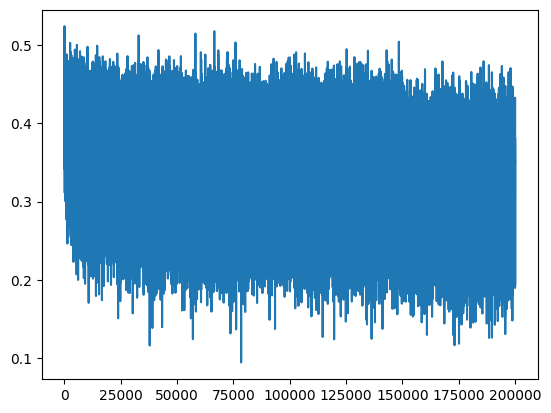

In [ ]:
plt.plot(lossi)

In [ ]:
# now to improve previous near-useless noisy graph
torch.arange(10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
torch.arange(10).view(2,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
torch.arange(10).view(2,-1)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
torch.tensor(lossi).shape

torch.Size([200000])

In [ ]:
torch.tensor(lossi).view(-1,1000).shape

torch.Size([200, 1000])

In [ ]:
torch.tensor(lossi).view(-1, 1000).mean(1)

tensor([0.4025, 0.3816, 0.3732, 0.3690, 0.3647, 0.3612, 0.3627, 0.3594, 0.3592,
        0.3576, 0.3550, 0.3531, 0.3552, 0.3493, 0.3515, 0.3498, 0.3523, 0.3497,
        0.3490, 0.3480, 0.3467, 0.3482, 0.3459, 0.3465, 0.3449, 0.3422, 0.3449,
        0.3442, 0.3421, 0.3438, 0.3445, 0.3412, 0.3410, 0.3421, 0.3437, 0.3414,
        0.3417, 0.3397, 0.3393, 0.3415, 0.3417, 0.3406, 0.3401, 0.3385, 0.3362,
        0.3397, 0.3405, 0.3379, 0.3352, 0.3369, 0.3396, 0.3404, 0.3379, 0.3361,
        0.3379, 0.3364, 0.3346, 0.3387, 0.3339, 0.3348, 0.3391, 0.3375, 0.3343,
        0.3365, 0.3382, 0.3333, 0.3371, 0.3361, 0.3339, 0.3378, 0.3355, 0.3356,
        0.3367, 0.3337, 0.3357, 0.3341, 0.3344, 0.3345, 0.3371, 0.3324, 0.3360,
        0.3327, 0.3348, 0.3358, 0.3336, 0.3337, 0.3363, 0.3319, 0.3338, 0.3331,
        0.3333, 0.3345, 0.3326, 0.3329, 0.3350, 0.3303, 0.3331, 0.3309, 0.3337,
        0.3337, 0.3373, 0.3321, 0.3309, 0.3324, 0.3312, 0.3321, 0.3315, 0.3335,
        0.3338, 0.3340, 0.3325, 0.3336, 

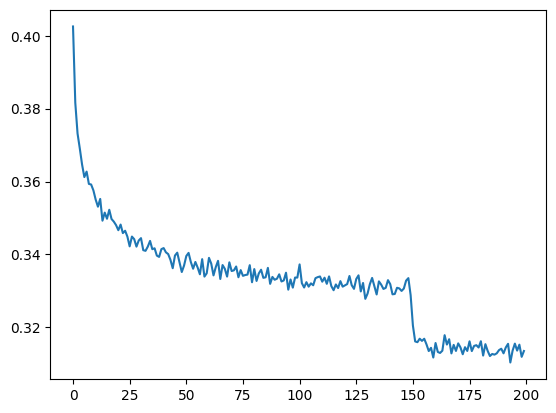

In [ ]:
plt.plot(torch.tensor(lossi).view(-1, 1000).mean(1))

# Evaluate the loss

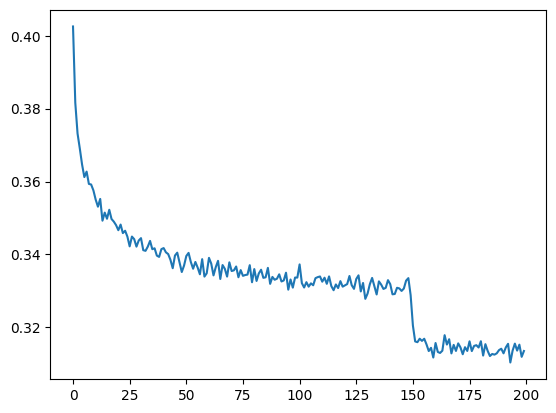

In [ ]:
plt.plot(torch.tensor(lossi).view(-1, 1000).mean(1))

In [ ]:
# put layers into eval mode (needed for batchnorm especially)
for layer in model.layers:
  layer.training = False

In [ ]:
# evaluate the loss
@torch.no_grad() # this decorator disables gradient tracking inside pytorch
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  logits = model(x)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.0431485176086426
val 2.096590757369995


# Sample from the model

In [ ]:
# sample from the model
for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      # forward pass the neural net
      logits = model(torch.tensor([context]))
      probs = F.softmax(logits, dim=1)
      # sample from the distribution
      ix = torch.multinomial(probs, num_samples=1).item()
      # shift the context window and track the samples
      context = context[1:] + [ix]
      out.append(ix)
      # if we sample the special '.' token, break
      if ix == 0:
        break

    print(''.join(itos[i] for i in out)) # decode and print the generated word

incolette.
kyliah.
bristonai.
edbeilyah.
myliaan.
adhi.
dechermi.
jordynte.
jayden.
roce.
dizelle.
den.
odonica.
kowancy.
ze.
sha.
she.
elynn.
chara.
ceon.


# Expanding the model

## Update Embedding Layer

### 1. **Current Model State**:
The current model has training and validation losses that are close to each other. This suggests that the model isn't overfitting. In such cases, a common approach to improve performance is to expand the model: increase its capacity by adding more neurons or layers.

### 2. **Problem with Current Architecture**:
Right now, the model takes in a sequence of characters, processes them through a single layer, and predicts the next character. This is somewhat akin to trying to understand a sentence by reading all its words at once. While you can add more layers, you're still compressing all the information at the very beginning, which might be suboptimal.

### 3. **Inspiration from WaveNet**:
WaveNet offers a different approach. Instead of compressing all characters at once, it processes the input in a hierarchical manner. Imagine trying to understand a sentence not word by word, but by understanding two words at a time, then four words, then eight, and so on. This allows the model to capture relationships and patterns at different scales.

### 4. **Progressive Fusion**:
The key idea is to combine (or "fuse") input data progressively. Start by combining pairs of characters (bigrams). Then, combine pairs of bigrams to form four-character chunks, and so on. This slow fusion ensures that the model has a more refined understanding of the input data at various levels of granularity.

### 5. **Dilated Causal Convolutions**:
While it sounds complex, the core idea is about efficiency and preserving information. In standard convolutions, each layer can only see a limited portion of the input. By using dilated convolutions, each layer can see a wider range of input, allowing the model to capture longer-term dependencies without needing extremely deep architectures. The "causal" part ensures that the prediction at any time step is only based on past and current data, not future data.

### Conclusion:
In essence, the lecturer is suggesting moving from a simplistic model that quickly compresses input information to a more sophisticated architecture that understands the input in a layered and hierarchical manner. This approach, inspired by WaveNet, allows the model to capture patterns and relationships at different scales, potentially leading to better performance. The implementation details, like dilated causal convolutions, are there to ensure efficiency and respect the temporal nature of the data.

# Layer inspector tool

In [ ]:
for layer in model.layers:
  print(layer.__class__.__name__, ':', tuple(layer.out.shape) )


Embedding : (32, 8, 10)
FlattenConsecutive : (32, 80)
Linear : (32, 300)
BatchNorm1d : (32, 300)
Tanh : (32, 300)
Linear : (32, 27)


In [ ]:
# same optimization as last time
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,))
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  logits = model(Xb)
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update: simple SGD
  lr = 0.1 if i < 150000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

  break

      0/ 200000: 3.3032


In [ ]:
for layer in model.layers:
  print(layer.__class__.__name__, ':', tuple(layer.out.shape) )

Embedding : (32, 8, 10)
FlattenConsecutive : (32, 4, 20)
Linear : (32, 4, 300)
BatchNorm1d : (32, 4, 300)
Tanh : (32, 4, 300)
FlattenConsecutive : (32, 2, 600)
Linear : (32, 2, 300)
BatchNorm1d : (32, 2, 300)
Tanh : (32, 2, 300)
FlattenConsecutive : (32, 600)
Linear : (32, 300)
BatchNorm1d : (32, 300)
Tanh : (32, 300)
Linear : (32, 27)


# Full Training with block size 8

In [ ]:
# same optimization as last time
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,))
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  logits = model(Xb)
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update: simple SGD
  lr = 0.1 if i < 150000 else 0.01 # step learning rate decay
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

      0/ 200000: 3.3005
  10000/ 200000: 2.2621
  20000/ 200000: 1.6759
  30000/ 200000: 2.1167
  40000/ 200000: 1.7575
  50000/ 200000: 2.0973
  60000/ 200000: 2.3095
  70000/ 200000: 1.9639
  80000/ 200000: 1.6569
  90000/ 200000: 2.3567
 100000/ 200000: 1.9784
 110000/ 200000: 1.7420
 120000/ 200000: 1.6916
 130000/ 200000: 2.2580
 140000/ 200000: 1.9683
 150000/ 200000: 1.8872
 160000/ 200000: 1.5089
 170000/ 200000: 1.9284
 180000/ 200000: 1.7699
 190000/ 200000: 1.5594


In [ ]:
for layer in model.layers:
  layer.training = False

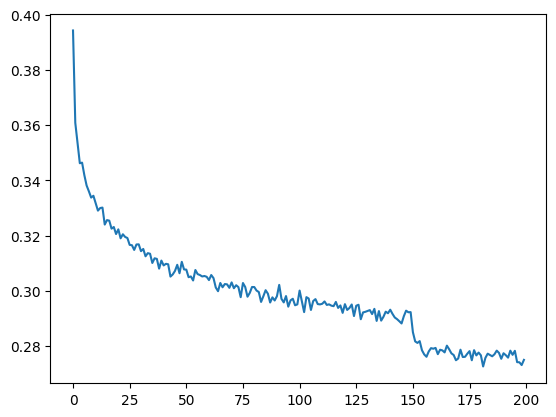

In [ ]:
plt.plot(torch.tensor(lossi).view(-1, 1000).mean(1))

In [ ]:
# evaluate the loss
@torch.no_grad() # this decorator disables gradient tracking inside pytorch
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  logits = model(x)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 1.8679423332214355
val 2.008166551589966


In [ ]:
# sample from the model
for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      # forward pass the neural net
      logits = model(torch.tensor([context]))
      probs = F.softmax(logits, dim=1)
      # sample from the distribution
      ix = torch.multinomial(probs, num_samples=1).item()
      # shift the context window and track the samples
      context = context[1:] + [ix]
      out.append(ix)
      # if we sample the special '.' token, break
      if ix == 0:
        break

    print(''.join(itos[i] for i in out)) # decode and print the generated word

luselta.
ralin.
gahlyah.
shahire.
zinson.
jayleah.
makerin.
sofely.
dora.
wyeli.
lamaah.
perlynn.
jawell.
milie.
isabella.
cal.
lucia.
elisiot.
xyovalluwaromiloba.
aharian.


# Glossary


## Random seeding in the context of PyTorch and neural network training.

### 1. **Purpose of Seeding**:
In machine learning, especially in neural networks, we often initialize weights and biases randomly. Moreover, when you're dealing with stochastic processes like dropout, sampling, and other random transformations, the behavior can differ from one run to another due to the randomness. By setting a seed for these random operations, we ensure that the randomness is consistent across multiple runs, making experiments reproducible.

### 2. **torch.manual_seed() vs. torch.Generator()**:

- **torch.manual_seed(seed)**:
  This sets the seed for the default global generator in PyTorch. Every time you call a function that involves randomness without specifying a generator, it uses the global generator. When you set a manual seed, you're setting the seed for this global generator. It's a straightforward way to ensure consistent randomness throughout your program.

- **torch.Generator()**:
  This creates an independent random number generator. You can manually set the seed for this generator and use it for specific operations, keeping it separate from the global generator. This is particularly useful when you want different parts of your code to have different random behaviors, but still want each of those behaviors to be reproducible.

### 3. **Why not always use torch.manual_seed()?**:
In many cases, using `torch.manual_seed()` is sufficient, especially for simpler projects and experiments. However, as your projects grow in complexity, there might be reasons to maintain different seeds:

- **Fine-grained Control**: You might want different parts of your code to operate with different seeds. For example, if you're doing multi-task learning with multiple neural networks, you might want to initialize each network with a different seed, but still want each initialization to be reproducible.
  
- **Parallelism**: When running operations in parallel, having separate generators can prevent potential synchronization issues and ensure that each parallel operation is consistent across runs.

- **Isolation**: By using different generators for different parts of your code, you can change one part of your code without affecting the randomness in another part.

### Conclusion:
While `torch.manual_seed()` is a quick and effective method for most use cases, as your projects become more complex, you might find situations where the granularity and control offered by `torch.Generator()` become necessary. Knowing when and how to use each method appropriately can make your experiments more organized and your results more reliable.

## High-level hierarchical view of PyTorch API

The PyTorch API is extensive, but I'll provide a high-level hierarchical view of its core components, which should give you a roadmap for diving deeper:

1. **Tensors**
    - Core data structure in PyTorch, similar to NumPy arrays but with GPU support.
    - `torch.Tensor` class and its various methods.
    - Creation: `torch.empty()`, `torch.rand()`, `torch.zeros()`, `torch.ones()`, `torch.tensor()`, etc.
    - Operations: Mathematical, Reduction, Comparison, Matrix, etc.
    - Indexing, Slicing, Joining, Mutating ops: `torch.cat()`, `torch.stack()`, etc.

2. **Autograd**
    - Automatic differentiation library.
    - `torch.autograd` module.
    - `Variable`: Deprecated, but historically important. All Tensors now have `requires_grad` attribute.
    - `Function`: Defines a forward and backward operation. Links to `Variable` to build a computation graph.

3. **Neural Networks**
    - `torch.nn` module.
    - Layers: Pre-defined layers like `nn.Linear`, `nn.Conv2d`, `nn.ReLU`, etc.
    - Loss functions: `nn.CrossEntropyLoss`, `nn.MSELoss`, etc.
    - Optimizers: Located in `torch.optim`, e.g., `optim.Adam`, `optim.SGD`.
    - Utilities: `nn.functional` for stateless functions like activation functions.
    - `nn.Module`: Base class for all neural network modules, aiding in organizing code and parameters.
    - `nn.Sequential`: A sequential container for stacking layers.

4. **Utilities**
    - Tensor transformations: `torchvision.transforms`.
    - Data handling for NN training: `torch.utils.data.Dataset`, `torch.utils.data.DataLoader`.

5. **Optimization**
    - `torch.optim` module.
    - Optimization algorithms like SGD, Adam, RMSProp, etc.
    - Learning rate schedulers: Adjust LR on-the-fly during training.

6. **Serialization**
    - Save and load models: `torch.save()`, `torch.load()`, `nn.Module.load_state_dict()`, etc.

7. **Distributed Training**
    - `torch.distributed`: For multi-GPU and distributed training.
    - Backend support for different communication protocols.

8. **Other Libraries & Extensions**
    - `torchvision`: Datasets, models, and image transformations for computer vision.
    - `torchaudio`: Audio processing tools and datasets.
    - `torchtext`: NLP data utilities and models.

9. **Device & CUDA**
    - Tensor operations on different devices: CPU, GPU.
    - CUDA Tensors: Tensors transferred to GPU.
    - Device management: `torch.cuda`, `torch.device`.

10. **JIT Compiler**
    - `torch.jit`: Just-In-Time compiler to convert PyTorch models to a representation that can be optimized and run in non-Python environments.

11. **Quantization**
    - Reduce the size of models and increase runtime performance.
    - `torch.quantization`: Contains utilities for model quantization.

Start with Tensors and Autograd to get a solid grasp on the basics. Then, you can delve into neural networks with the `torch.nn` module. After mastering these, choose specialized topics based on your interests and needs.

## `torch.nn.Embedding`.

### 1. **The Concept of Embeddings**:

Embeddings are a powerful tool in the world of deep learning, especially when dealing with categorical data, like words in a language. Instead of representing words or other categorical variables as discrete values (like integers), embeddings represent them as continuous vectors. These vectors capture more information and relationships between different words or categories.

### 2. **torch.nn.Embedding**:

`torch.nn.Embedding` is PyTorch's module to create an embedding layer. Essentially, it's a lookup table that maps from integer indices (representing specific words or categories) to dense vectors (their embeddings).

### 3. **Parameters**:

- **num_embeddings**: Total number of distinct categories/words.
  
- **embedding_dim**: The size of each embedding vector, i.e., the number of units each embedding should have.

### 4. **Why Use Embeddings?**:

- **Dimensionality Reduction**: One-hot encoded vectors can be massive (imagine a vector of length 50,000 for a moderate-sized vocabulary, with all zeros except for a single one). Embeddings condense this information into a much smaller dimension, like 300 for word embeddings.

- **Capture Relationships**: Embeddings are learned from data. This means that words or categories that have similar meanings or behaviors can have embeddings that are close to each other in the vector space.

- **Flexibility**: Embeddings can be fine-tuned during training. This means that as a model learns a task, it can also adjust the embeddings to capture any task-specific insights.

### 5. **Usage**:

An embedding layer is typically initialized with random weights and will learn an embedding for all the words in the training dataset. It is a flexible layer that can be used in a variety of ways, such as:

- **Pre-trained Embeddings**: Sometimes, embeddings are pre-trained on a larger dataset and then fine-tuned on a specific task. Word2Vec, GloVe, and FastText are popular pre-trained word embeddings.

- **Task-specific Embeddings**: For some tasks, it might be beneficial to let the embedding layer learn embeddings from scratch, tailored to the specific task.

### 6. **Under the Hood**:

At its core, an embedding layer is a weight matrix. The rows of this matrix correspond to each category's unique ID (like a word's ID), and the columns correspond to the embedding dimensions. When you "pass" an integer to this layer, it returns the corresponding row of the weight matrix. This operation is essentially a lookup, making it efficient.

### Conclusion:

`torch.nn.Embedding` provides an efficient and straightforward way to handle categorical data in neural networks. By converting discrete categorical values into continuous vectors, embeddings enable models to capture intricate relationships in the data and improve performance on a variety of tasks.

## `torch.nn.Flatten`.

### 1. **The Basic Idea**:

When working with neural networks, especially convolutional neural networks (CNNs), we often deal with multi-dimensional data (like images). After passing this data through several convolutional and pooling layers, we often want to use the resulting multi-dimensional feature maps in fully connected layers (dense layers). However, fully connected layers expect a 1D input. Here's where `torch.nn.Flatten` comes in: it's used to transform multi-dimensional data into a one-dimensional format.

### 2. **torch.nn.Flatten**:

`torch.nn.Flatten` is a layer provided by PyTorch that reshapes its input into a one-dimensional tensor. It's effectively a 'flattening' operation.

### 3. **Parameters**:

- **start_dim**: Dimension to start the flattening. Typically, for a batch of images, the data shape might be `[batch_size, channels, height, width]`. If we want to flatten the channel, height, and width dimensions, we'd start the flattening from dimension 1 (0-based indexing for dimensions). By default, `start_dim` is 1.

- **end_dim**: Dimension to end the flattening. By default, it's -1, meaning it will flatten all dimensions from `start_dim` to the last dimension.

### 4. **Why Use Flatten?**:

- **Transitioning in Architectures**: It's common in CNNs to have convolutional layers followed by dense layers. The flatten layer acts as a bridge between these two, reshaping the output of the convolutional layers to a format that dense layers can work with.

- **Simplicity**: Instead of manually reshaping tensors using `.view()` or `.reshape()`, `torch.nn.Flatten` provides a more readable and explicit way to flatten data within a model architecture.

### 5. **Usage**:

Imagine you have a batch of images with the shape `[batch_size, channels, height, width]`. After passing them through convolutional layers, you might get a shape like `[batch_size, 64, 7, 7]`. Before sending this to a fully connected layer, you'd use the flatten layer:

```python
flat_layer = torch.nn.Flatten()
flattened_data = flat_layer(conv_output)
```

Now, `flattened_data` will have a shape `[batch_size, 64*7*7]`, ready to be passed to a fully connected layer.

### 6. **In Context**:

If you're familiar with other deep learning frameworks, you might recognize this as similar to TensorFlow's `tf.keras.layers.Flatten` or Keras's `Flatten` layer. It's a staple in the toolkit of designing deep learning architectures.

### Conclusion:

`torch.nn.Flatten` is a utility layer in PyTorch that streamlines the process of converting multi-dimensional tensors into a one-dimensional format, easing the transition from convolutional layers to fully connected layers in neural network architectures. It's a straightforward yet crucial component for many deep learning models, particularly CNNs.

## `torch.nn.Sequential`.

### 1. **The Basic Idea**:

When building neural networks, we often create architectures that involve a series of layers or operations that process data in a specific order. `torch.nn.Sequential` is a container provided by PyTorch that allows us to encapsulate a sequence of modules or operations into a single module, streamlining both the definition and execution of such sequences.

### 2. **torch.nn.Sequential**:

At its core, `torch.nn.Sequential` is essentially an ordered container of modules. Data passed to a `Sequential` module will traverse through each contained module in the order they were added, with the output of one module becoming the input to the next.

### 3. **Advantages**:

- **Readability**: Architectures, especially simpler ones, become more readable and compact. Instead of defining and calling layers separately, you can consolidate them into a single `Sequential` block.
  
- **Modularity**: It allows for easy reuse of certain sequences of operations across different architectures. If a specific sequence of layers gets used frequently, encapsulating it within a `Sequential` block makes it easier to plug into various models.

### 4. **Usage**:

Suppose you're designing a simple feedforward neural network with two hidden layers and ReLU activations:

Without `Sequential`:
```python
self.fc1 = torch.nn.Linear(input_size, hidden_size)
self.relu1 = torch.nn.ReLU()
self.fc2 = torch.nn.Linear(hidden_size, hidden_size)
self.relu2 = torch.nn.ReLU()
self.fc3 = torch.nn.Linear(hidden_size, output_size)
```
With `Sequential`:
```python
self.layers = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, output_size)
)
```

The latter is clearly more concise and readable.

### 5. **Points to Remember**:

- While `Sequential` is convenient, it's most suited for networks where the data flow is linear. For architectures with branches (like skip connections in ResNets) or multiple inputs/outputs, manual layer definition might be more appropriate.

- Modules in `Sequential` are executed in the order they're added, making the order crucial. Always ensure that layers are added in the intended sequence.

### 6. **In Context**:

If you're familiar with other deep learning frameworks, the concept might remind you of Keras's `Sequential` model. The idea of simplifying linear stacks of layers is a common one across various deep learning libraries, given its convenience.

### Conclusion:

`torch.nn.Sequential` is a convenient tool in the PyTorch library that helps in compactly defining and organizing linear sequences of operations in neural network architectures. While incredibly useful for straightforward, linear data flows, it's essential to remember its limitations when dealing with more complex architectures.

## `torch.squeeze`

The `torch.squeeze` function removes dimensions of size 1 from a tensor. It's particularly useful when certain operations introduce unwanted singleton dimensions, and you want to revert back to a more compact shape.

**Function signature**:
```python
torch.squeeze(input, dim=None, *, out=None)
```

- `input` (Tensor): The input tensor.
- `dim` (int, optional): Specifies which dimension to squeeze. If not specified, all dimensions of size 1 will be squeezed.
- `out` (Tensor, optional): The output tensor.

### **Examples**:

1. **Squeezing all dimensions of size 1**:

```python
import torch

# A tensor with shape [1, 3, 1, 2]
x = torch.tensor([[[[1, 2]], [[3, 4]], [[5, 6]]]])
print(x.shape)  # torch.Size([1, 3, 1, 2])

y = torch.squeeze(x)
print(y.shape)  # torch.Size([3, 2])
```

Here, `torch.squeeze` removed the first and third dimensions, both of size 1.

2. **Squeezing a specific dimension**:

If you only want to squeeze a specific dimension, you can specify it using the `dim` argument.

```python
z = torch.squeeze(x, dim=0)
print(z.shape)  # torch.Size([3, 1, 2])
```

In this case, only the first dimension of size 1 was squeezed.

3. **A tensor with no dimensions of size 1**:

```python
a = torch.tensor([[1, 2], [3, 4]])
print(a.shape)  # torch.Size([2, 2])

b = torch.squeeze(a)
print(b.shape)  # torch.Size([2, 2])
```

As there were no dimensions of size 1, `torch.squeeze` had no effect on the tensor's shape.

### **Note**:

Be cautious when using `torch.squeeze` without specifying a dimension. In some cases, especially when your tensor might sometimes have singleton dimensions due to variable data sizes (e.g., batch size of 1 in deep learning models), unintended squeezing might lead to shape mismatches or other errors in subsequent operations.

## `torch.randint`

### 1. **torch.randint**:

`torch.randint` is a PyTorch function that returns a tensor filled with random integers generated uniformly between two specified integer values (low and high).

The function signature is:
```python
torch.randint(low=0, high, size, *, dtype=None, layout=torch.strided, device=None, requires_grad=False)
```

- `low` (int, optional): Lowest integer to be drawn from the distribution. Default: 0.
- `high` (int): One above the highest integer to be drawn from the distribution.
- `size` (tuple): The shape of the output tensor.
- Additional arguments like `dtype`, `device`, and `requires_grad` allow you to further specify the nature of the returned tensor.

### 2. **Given Line**:

This would produce a 1D tensor with 4 random integer values in the specified range.

This line aims to generate a tensor of random integer values between 0 (inclusive) and `Xtr.shape[0]` (exclusive).

```python
ix = torch.randint(0, Xtr.shape[0], (4,))
```

## Convolutional Neural Network (CNN) in simple terms

Imagine you're trying to identify objects in a large photograph, but instead of looking at the entire picture all at once, you use a small magnifying glass to focus on specific parts of the picture one at a time. As you move the magnifying glass over the picture, you notice different features: maybe the edge of a building, the curve of a car, or the pattern of a shirt.

A Convolutional Neural Network (CNN) operates in a similar manner when processing images. Instead of analyzing the entire image in one go, it uses "filters" (akin to our magnifying glass) to scan through the image and detect specific features. These features could be edges, textures, colors, and more.

As the CNN processes the image through multiple layers:
1. **Early layers** might recognize simple patterns like lines and edges.
2. **Middle layers** might recognize more complex structures, like shapes or specific textures.
3. **Deeper layers** might recognize high-level features, such as a human face or a dog.

To continue with our analogy, after examining the entire photograph using the magnifying glass, you would then combine all the features you've noticed to determine what the entire image represents. Similarly, after detecting various features in an image, a CNN combines them in its later layers to determine the object in the image (e.g., "This is a picture of a cat").

In summary, a CNN processes images by scanning them for features using filters and then combines these features in sophisticated ways to make decisions about what the image contains. This structure makes CNNs particularly good at understanding visual data.
